In [1]:
import matplotlib.pyplot as plt
import re

In [9]:
data = """#tasklets: 1, block: 9
DPU instructions  = 1525312
#tasklets: 2, block: 9
DPU instructions  = 762688
#tasklets: 3, block: 9
DPU instructions  = 508523
#tasklets: 4, block: 9
DPU instructions  = 381420
#tasklets: 5, block: 9
DPU instructions  = 305203
#tasklets: 6, block: 9
DPU instructions  = 254373
#tasklets: 9, block: 9
DPU instructions  = 169671
#tasklets: 12, block: 9
DPU instructions  = 127351
#tasklets: 16, block: 9
DPU instructions  = 95629
#tasklets: 20, block: 9
DPU instructions  = 76623
#tasklets: 24, block: 9
DPU instructions  = 63970"""

In [10]:
pattern1 = re.compile(r"DPU instructions  = \s*(\d+(\.\d+)?)")

instr_count = []
for m in pattern1.finditer(data):
  # Extract the captured group (the number in scientific notation)
  # print(m)
  number = m.group(1)
  instr_count.append(float(number))

In [11]:
pattern2 = re.compile(r"DPU Kernel Time \(ms\): \s*(\d+\.\d+)")

times = []
for m in pattern2.finditer(data):
  # Extract the captured group (the number in scientific notation)
  number = m.group(1)
  times.append(float(number))

In [12]:
print(len(instr_count))
# assert len(times) == 24

11


In [13]:
def norm(array):
    m = min(array)
    M = max(array)
    d = M - m

    return [(el - m) / d for el in array]

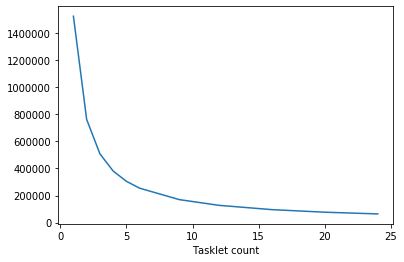

In [14]:
x = [1, 2, 3, 4, 5, 6, 9, 12, 16, 20, 24]

plt.plot(x, instr_count)
# plt.plot(x, norm(times))

plt.xlabel("Tasklet count")
# plt.ylabel("Instruction count of longest running tasklet")

plt.savefig("instr_per_tasklet_number.pdf")
plt.show()